#### This notebook shows how to import and manipulate MFC data and explains some of the features of the data set. 

Import libraries 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# needed for plots to appear in Jupyter notebook, not needed in regular .py python file (use plt.show() instead)
%matplotlib inline              

## Importing data from an excel file

Import data to Pandas data frame : the data frame is a sort of code equivalent to an excel spreadsheet

(this may take a while to run, as the imported file is large)

In [28]:
# d1 = pd.read_excel('data/MFCs_Yeshaswini_MScRobotics/MFC_data_COD/MFC1.xlsx', header=None, squeeze=True)
# d2 = pd.read_excel('data/MFCs_Yeshaswini_MScRobotics/MFC_data_COD/MFC2.xlsx', header=None)
# d1 = pd.read_excel('data/MFCs_Yeshaswini_MScRobotics/MFC_data_COD/MFC1.xlsx', header=None)
# d2 = pd.read_excel('data/MFCs_Yeshaswini_MScRobotics/MFC_data_COD/MFC2.xlsx', header=None)
# frames = [d1, d2]
# data = pd.concat(frames, axis=1)
# data.head()
loc = 'data/MFCs_Yeshaswini_MScRobotics/MFC_data_COD/'

#10k = 10kohm load, 1k = 1kohm load
data = pd.DataFrame({'10k_a': pd.read_excel(loc + 'MFC1.xlsx', header=None, squeeze=True), 
                     '10k_b': pd.read_excel(loc + 'MFC2.xlsx', header=None, squeeze=True), 
                     '10k_c': pd.read_excel(loc + 'MFC3.xlsx', header=None, squeeze=True),
                     '10k_d': pd.read_excel(loc + 'MFC4.xlsx', header=None, squeeze=True),
                     '1k_a': pd.read_excel(loc + 'MFC5.xlsx', header=None, squeeze=True),
                     '1k_b': pd.read_excel(loc + 'MFC6.xlsx', header=None, squeeze=True),
                     '1k_c': pd.read_excel(loc + 'MFC7.xlsx', header=None, squeeze=True),
                     '1k_d': pd.read_excel(loc + 'MFC8.xlsx', header=None, squeeze=True),
                     '1k_e': pd.read_excel(loc + 'MFC9.xlsx', header=None, squeeze=True),
                     '1k_f': pd.read_excel(loc + 'MFC10.xlsx', header=None, squeeze=True),
                     '10k_e': pd.read_excel(loc + 'MFC11.xlsx', header=None, squeeze=True),
                     '10k_f': pd.read_excel(loc + 'MFC12.xlsx', header=None, squeeze=True),
                    })

data.head()
data.shape

(90721, 12)

Add a column to represent the time series (in mins)

In [29]:
data['Time'] = pd.Series(range(data.shape[0])) * 2

Make the date_time column the index 

In [30]:
data.set_index('Time', drop=True, inplace=True)
data.head()

,10k_a,10k_b,10k_c,10k_d,1k_a,1k_b,1k_c,1k_d,1k_e,1k_f,10k_e,10k_f
Time,,,,,,,,,,,,
0,-0.010117,0.014379,0.028758,0.027007,-0.010117,0.014379,0.028758,0.027007,-0.010117,0.014379,0.028758,0.027007
2,-0.009410,0.015084,0.031092,0.029807,-0.009410,0.015084,0.031092,0.029807,-0.009410,0.015084,0.031092,0.029807
4,-0.008703,0.015789,0.033425,0.032607,-0.008703,0.015789,0.033425,0.032607,-0.008703,0.015789,0.033425,0.032607
6,-0.007996,0.016494,0.035758,0.035407,-0.007996,0.016494,0.035758,0.035407,-0.007996,0.016494,0.035758,0.035407
8,-0.007289,0.017199,0.038092,0.038207,-0.007289,0.017199,0.038092,0.038207,-0.007289,0.017199,0.038092,0.038207


Numerical data can alternatively be handled as a numpy array.

In [21]:
# Convert data frame to numpy array
data_array = data.to_numpy()

# Add a column to represent the time series (in mins)
t_series = np.array(range(data_array.shape[0])) * 2
data_array = np.c_[t_series, data_array]

## Plotting the data

Plotting a numpy array is very simple

Text(0.5, 1.0, ' MFC1 ')

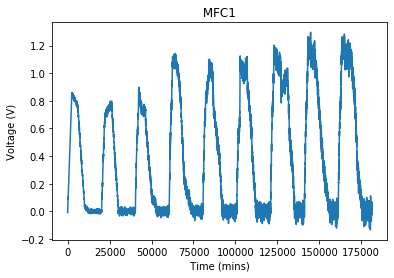

In [22]:
plt.plot(data_array[:,0], data_array[:,1])
plt.xlabel(' Time (mins) ')
plt.ylabel(' Voltage (V) ')
plt.title(' MFC1 ')

### What this plot shows

In the plot, we can see the voltage from the MFC. 

The MFC is given food, a spike or peak is observed in the voltage. 

As the food is used up, the voltage falls until the next feeding time. 

While a schedule of feeding times was recorded, it is much easier to determine the MFC feeding times by identifying the points at which there was a very sharp rise in voltage. 

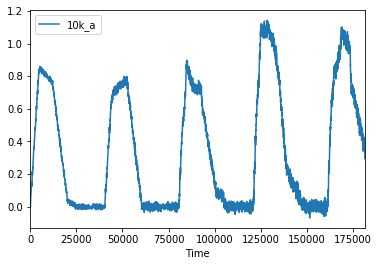

In [23]:
# One MFC
data.plot(y=['10k_a' ])

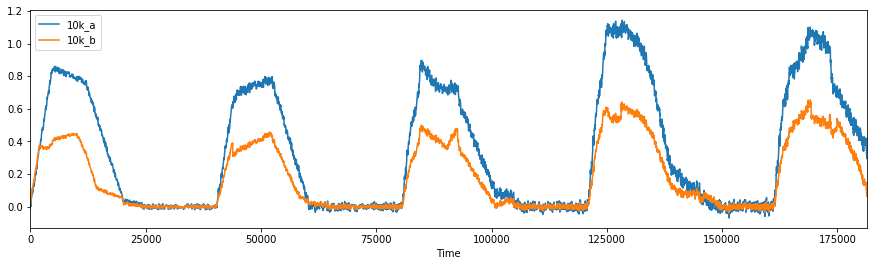

In [24]:
# Two MFCs on the same plot
data.plot(y=['10k_a' ,'10k_b' ], figsize=(15,4))

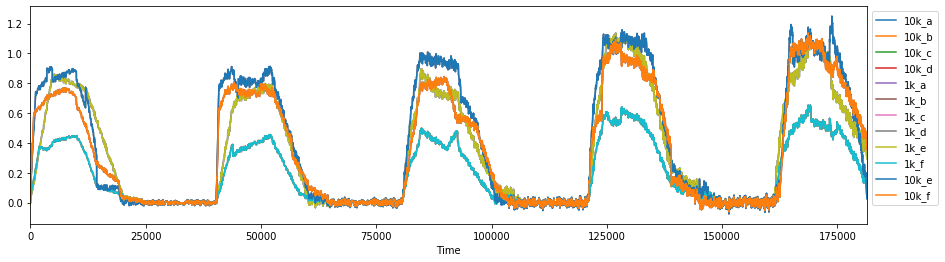

In [25]:
# All MFCs
ax = data.plot(figsize=(15,4));
ax.legend(loc='best', bbox_to_anchor=(1,1))

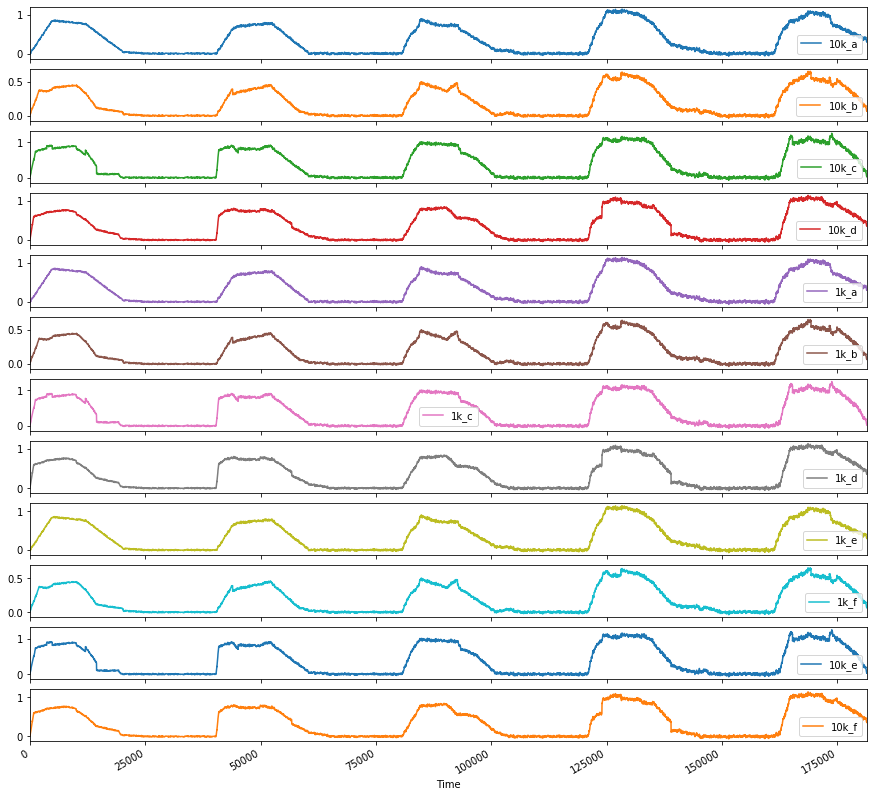

In [27]:
# All MFCs on seperate sub-plots
data.plot(subplots=True, figsize=(15,15));

## What affects the MFC voltage? 
The MFC voltage is affected by the conectration of food. 

The schedule of food concentrations used: 
<br>Weeks 1-3 : COD = 70
<br>Weeks 4-6 : COD = 300
<br>Weeks 7-9 : COD = 500

<img src="img/COD_recipes.png" alt="Drawing" style="width: 700px;"/>

<img src="img/COD_schedule.png" alt="Drawing" style="width: 400px;"/>

We can use this to divide the data into periods during which different food was used.  